In [51]:
import matplotlib.pyplot as plt
import numpy as np
from gui.utils import parseImage
from gui.car import Car,generateRandomColor
import graph.graph_parser as gp
from graph.node import Node
from algorithms.bfs import BFS
from algorithms.dfs import DFS
import pandas as pd
import os
import random
import time
import sys

Set Static Variables

In [43]:
sys.setrecursionlimit(10**6)
NumberOfCars=3

Find all circuits that exist
circuits will have the format (Name,File path)

In [44]:
circuits=[]
with os.scandir('gui/circuits/') as circuitsFiles:
    for circuit in circuitsFiles:
        name=circuit.name
        trackName=name.split('.')[0]
        circuits.append((trackName,f'gui/circuits/{name}'))

Get all the algoriths that will be used
algorithms will have the format (Name,class object)

In [45]:
algorithms=[
    ("Depth First Search",DFS()),
    ("Breath First Search",BFS())
    ]

Helper Functions to make the simulation and creating the graph from the sircuit file

In [46]:
def getGraphFromImage(input):
    matrix = parseImage(input,"temp.png")
    graph=gp.circuit_from_matrix(matrix)
    return graph

def simulate(algorithm,graph):
    """
       Uses the algorithm in the track to simulate the car
    """
    cars=[]
    for i in range(NumberOfCars):
        startingNode=random.choice(graph.starts)
        start=time.time()
        cost,nodes = algorithm.search(graph, Node(startingNode[0], startingNode[1], 0, 0), graph.finishes)
        end=time.time()
        c=Car(0,color=generateRandomColor(),tlen=cost)
        c.fromNodes(nodes)
        cars.append((end-start,c))
    return cars

Data structure


{
    'VAR:algorithm':{
        'VAR:circuit':[
            {
            'TimeCost':FLOAT,
            'Distance':FLOAT,
            'TopSpeed':FLOAT,
            'AvgSpeed':FLOAT,
            'MedSpeed':FLOAT,
            'StdSpeed':FLOAT,
            'VarSpeed':FLOAT,
            'P25Speed':FLOAT,
            'P50Speed':FLOAT,
            'P75Speed':FLOAT
            }
        ],
    }
}

In [49]:
data={}
for algorithmN,algorithmI in algorithms:
    data[algorithmN]={}
    for circuitN,circuitF in circuits:
        data[algorithmN][circuitN]=[]
        graph=getGraphFromImage(circuitF)
        cars=simulate(algorithmI,graph)
        
        carsData=map(lambda timeCostcar: {
            'TimeCost':timeCostcar[0],
            'Distance':timeCostcar[1].tlen,
            'TopSpeed':timeCostcar[1].getTopSpeed(),
            'AvgSpeed':timeCostcar[1].getAverageSpeed(),
            'MedSpeed':timeCostcar[1].getMedian(),
            'StdSpeed':timeCostcar[1].getStd(),
            'VarSpeed':timeCostcar[1].getVar(),
            'P25Speed':timeCostcar[1].get25Percentil(),
            'P50Speed':timeCostcar[1].get50Percentil(),
            'P75Speed':timeCostcar[1].get75Percentil()
        },cars)
        data[algorithmN][circuitN]=list(carsData)

{'Depth First Search': {'barcelona': [{'TimeCost': 0.303253173828125, 'Distance': 8375, 'TopSpeed': 6.082762530298219, 'AvgSpeed': 1.2580011952950674, 'MedSpeed': 1.0, 'StdSpeed': 0.9794688369247944, 'VarSpeed': 0.9593592025068094, 'P25Speed': 1.0, 'P50Speed': 1.0, 'P75Speed': 2.0}, {'TimeCost': 0.31297826766967773, 'Distance': 8375, 'TopSpeed': 6.082762530298219, 'AvgSpeed': 1.2580011952950674, 'MedSpeed': 1.0, 'StdSpeed': 0.9794688369247944, 'VarSpeed': 0.9593592025068094, 'P25Speed': 1.0, 'P50Speed': 1.0, 'P75Speed': 2.0}, {'TimeCost': 0.30648350715637207, 'Distance': 8375, 'TopSpeed': 6.082762530298219, 'AvgSpeed': 1.2580011952950674, 'MedSpeed': 1.0, 'StdSpeed': 0.9794688369247944, 'VarSpeed': 0.9593592025068094, 'P25Speed': 1.0, 'P50Speed': 1.0, 'P75Speed': 2.0}], 'singapura': [{'TimeCost': 0.060455322265625, 'Distance': 5622, 'TopSpeed': 4.123105625617661, 'AvgSpeed': 0.9962437901912768, 'MedSpeed': 1.0, 'StdSpeed': 0.757947198977827, 'VarSpeed': 0.5744839564383337, 'P25Speed': 

Concise the data given to only filter for average distance and speed

{'VAR:algorithm':{
    'VAR:circuit':{
        'AvgTime':FLOAT,
        'AvgDistance':FLOAT
        }
    }
}

In [54]:
AVGData={}


for alg,algData in data.items():
    AVGData[alg]={}
    for cir,cirData in algData.items():
        AVGData[alg][cir]={}
        totalN=0
        totalTime=0
        totalDistance=0
        for car in cirData:
            totalN += 1
            totalTime += car['TimeCost']
            totalDistance += car['Distance']
        AVGData[alg][cir]['AvgTime']=totalTime/totalN
        AVGData[alg][cir]['AvgDistance']=totalDistance/totalN

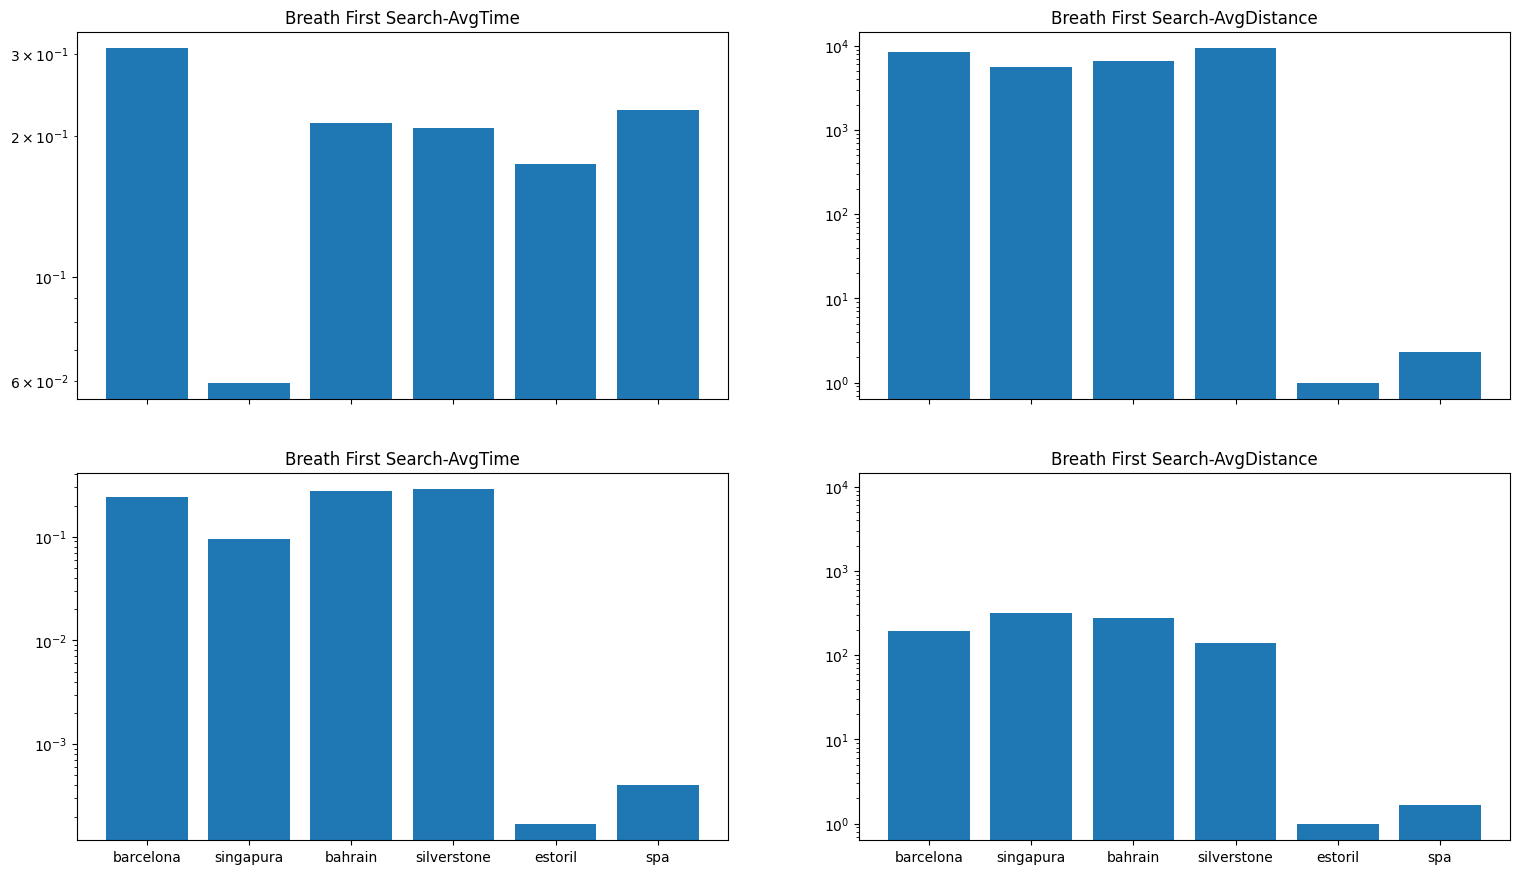

In [74]:
YAxisN=0
for alg,algData in AVGData.items():
    for cir,cirData in algData.items():
        YAxisN=len(cirData)
        break


fig, axs = plt.subplots(len(AVGData),YAxisN,sharex=True)
fig.set_size_inches(18.5, 10.5)
#for each algorithm
for p,(algName,algData) in enumerate(AVGData.items()):
    
    for i in range(YAxisN):
        xAxis=[]#Circuits
        yAxis=[]
        for circuitName,circuitData in algData.items():
            xAxis.append(circuitName)
            yAxis.append(list(circuitData.values())[i])
            typeName=list(circuitData.keys())[i]
        axs[p,i].set_title(f"{alg}-{typeName}")
        if i!=0:
            axs[p,i].sharey(axs[0, i])
        
        axs[p,i].set_yscale('log')
        axs[p,i].bar(xAxis,yAxis)
